## Data understanding and data loading

In [3]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
print('Share bikes, not pollution !')

Share bikes, not pollution !


In [5]:
raw_df = pd.read_csv('day.csv')

In [6]:
raw_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
raw_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
raw_df.shape

(730, 16)

#### Dropping the unnecessarry columns and arranging the columns by significance


In [10]:
cleansed_df = raw_df.drop(columns=[ 'instant', 'dteday', 'casual','registered'], axis='columns')
cleansed_df = cleansed_df[['cnt', 'season', 'yr','mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
cleansed_df.head()

,cnt,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,985,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882
1,801,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113
2,1349,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703
3,1562,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832
4,1600,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300


#### Map all values of categorical variables from data dictionary

In [11]:
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'Jun', 6: 'Jul', 7: 'Aug', 8: 'Sep', 9: 'Oct', 10: 'Nov', 11: 'Dec'}
season_map = {1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}
# weekday_map = {0: 'monday', 1: 'tuesday', 2: 'wednesday', 3: 'thursday', 4: 'friday', 5: 'saturday', 6: 'sunday'}
yr_map = {0: 2018, 1:2019}
weathersit_map = {1: 'clear_cloudy', 2: 'cloudy_mist', 3: 'light_rain_snow__cloudy', 4: 'heavy_rain_snow_fog'}
mapped_df = cleansed_df.copy()
boom_bikes = cleansed_df.copy()
mapped_df['mnth'] = mapped_df['mnth'].map(month_map)
mapped_df['season'] = mapped_df['season'].map(season_map)
# mapped_df['weekday'] = mapped_df['weekday'].map(weekday_map)
mapped_df['yr'] = mapped_df['yr'].map(yr_map)
boom_bikes_mapped = mapped_df.copy()
mapped_df['weathersit'] = mapped_df['weathersit'].map(weathersit_map)
boom_bikes.head()

,cnt,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,985,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882
1,801,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113
2,1349,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703
3,1562,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832
4,1600,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300


In [12]:
mapped_df.head()

,cnt,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,985,spring,2018,Jan,0,6,0,cloudy_mist,14.110847,18.18125,80.5833,10.749882
1,801,spring,2018,Jan,0,0,0,cloudy_mist,14.902598,17.68695,69.6087,16.652113
2,1349,spring,2018,Jan,0,1,1,clear_cloudy,8.050924,9.47025,43.7273,16.636703
3,1562,spring,2018,Jan,0,2,1,clear_cloudy,8.200000,10.60610,59.0435,10.739832
4,1600,spring,2018,Jan,0,3,1,clear_cloudy,9.305237,11.46350,43.6957,12.522300


### EDA

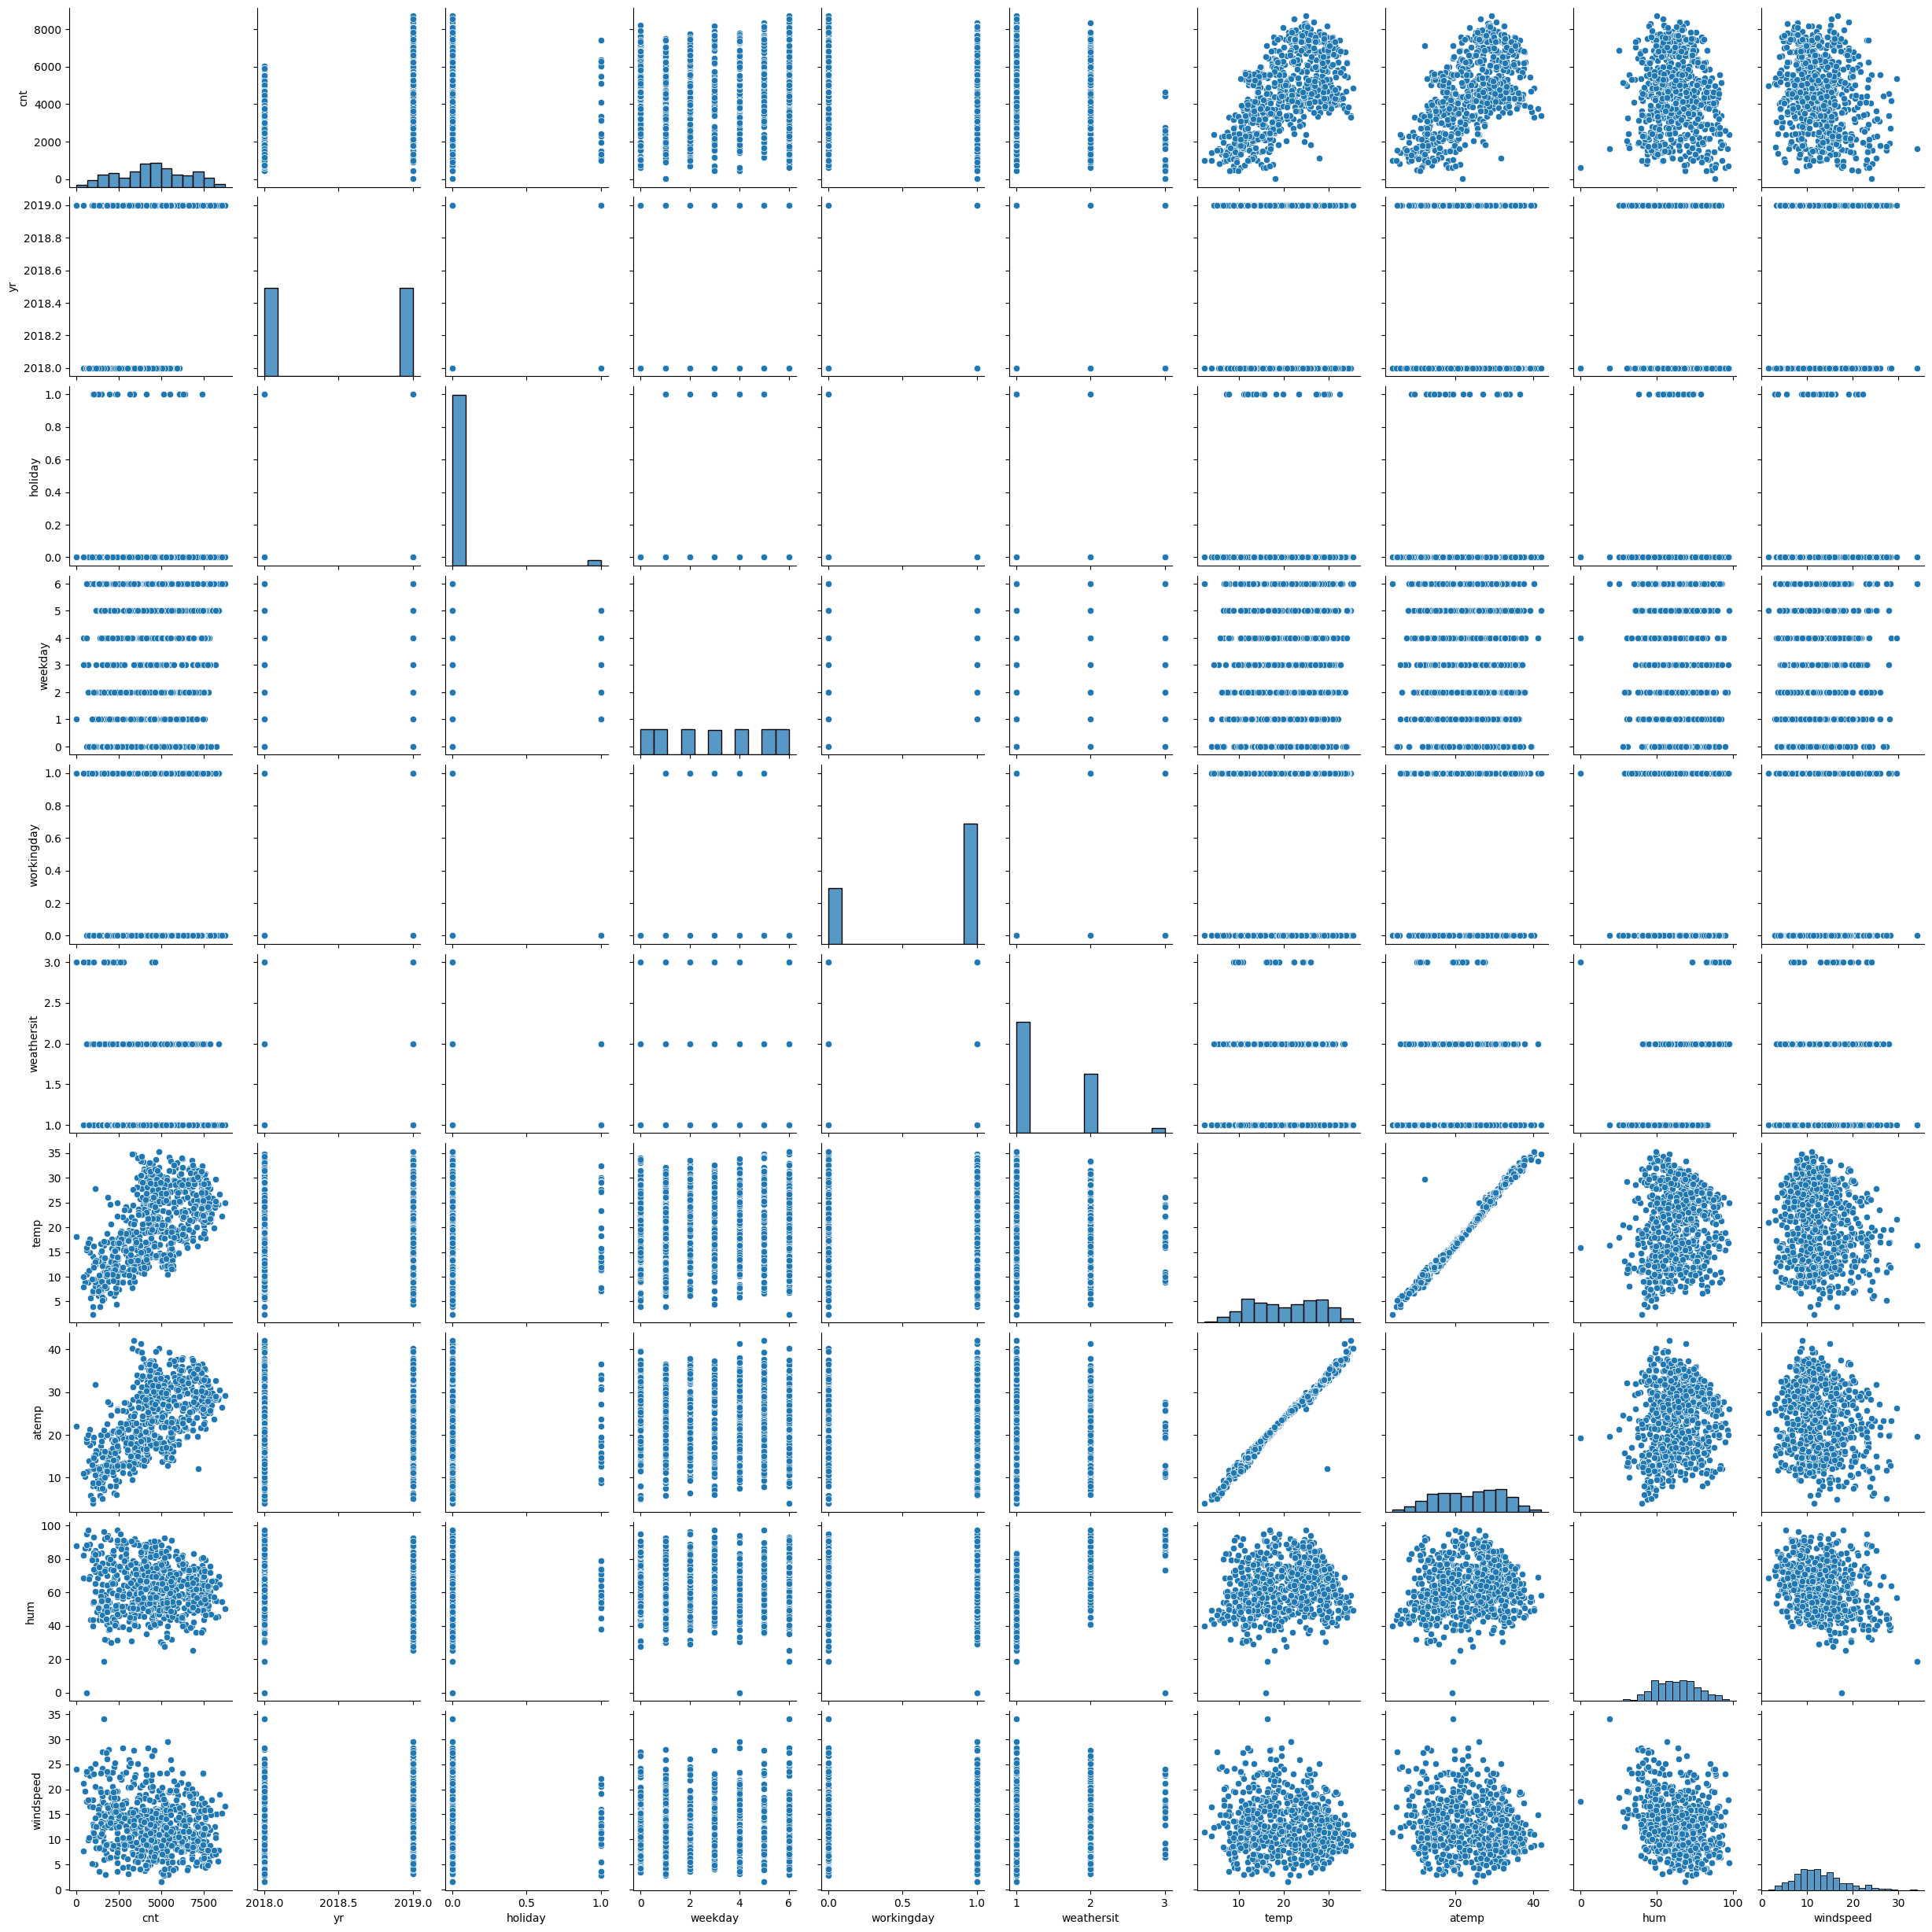

In [13]:
sns.pairplot(boom_bikes_mapped)
plt.show()

#### By categorical variables

<Axes: xlabel='workingday', ylabel='cnt'>

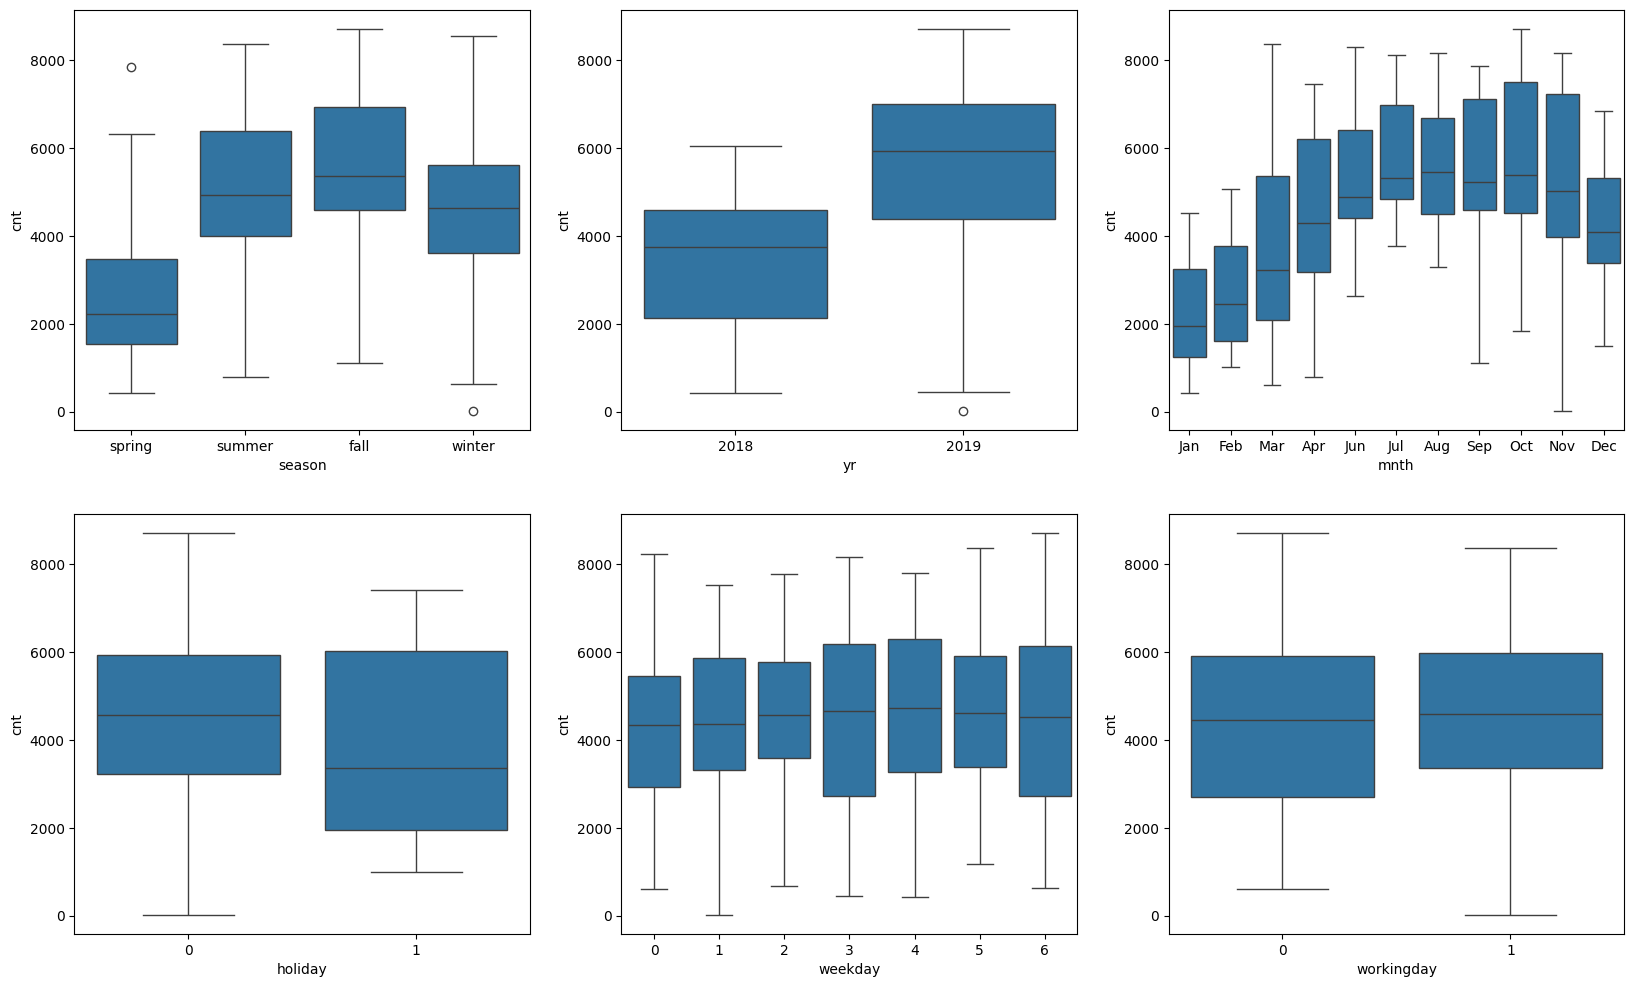

In [14]:
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='season', y='cnt', data=boom_bikes_mapped)
plt.subplot(2,3,2)
sns.boxplot(x='yr', y='cnt', data=boom_bikes_mapped)
plt.subplot(2,3,3)
sns.boxplot(x='mnth', y='cnt', data=boom_bikes_mapped)
plt.subplot(2,3,4)
sns.boxplot(x='holiday', y='cnt', data=boom_bikes_mapped)
plt.subplot(2,3,5)
sns.boxplot(x='weekday', y='cnt', data=boom_bikes_mapped)
plt.subplot(2,3,6)
sns.boxplot(x='workingday', y='cnt', data=boom_bikes_mapped)

<Axes: xlabel='weathersit', ylabel='cnt'>

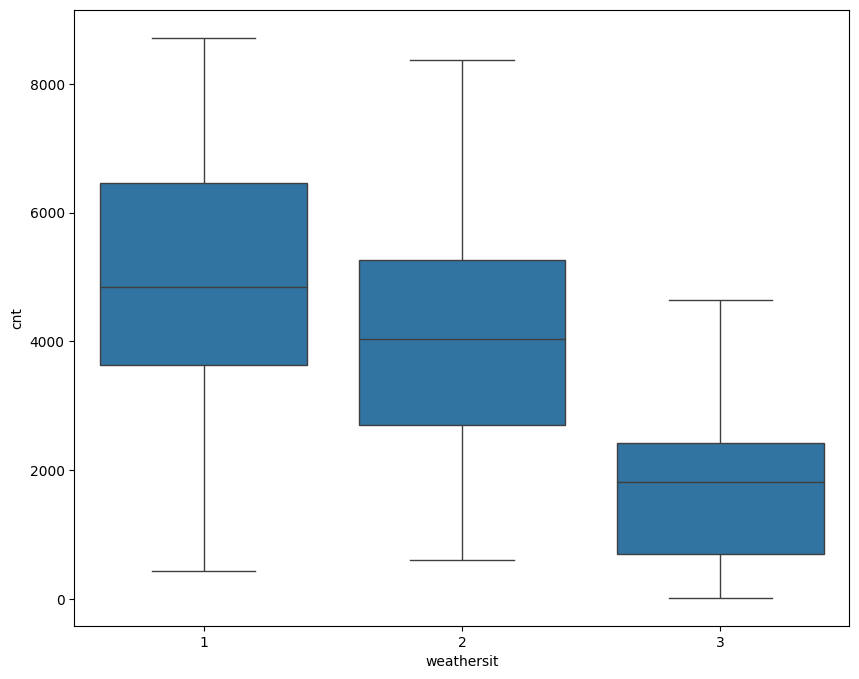

In [15]:
plt.figure(figsize=(10,8))
sns.boxplot(x='weathersit', y='cnt', data=boom_bikes_mapped)

<Axes: xlabel='weathersit', ylabel='cnt'>

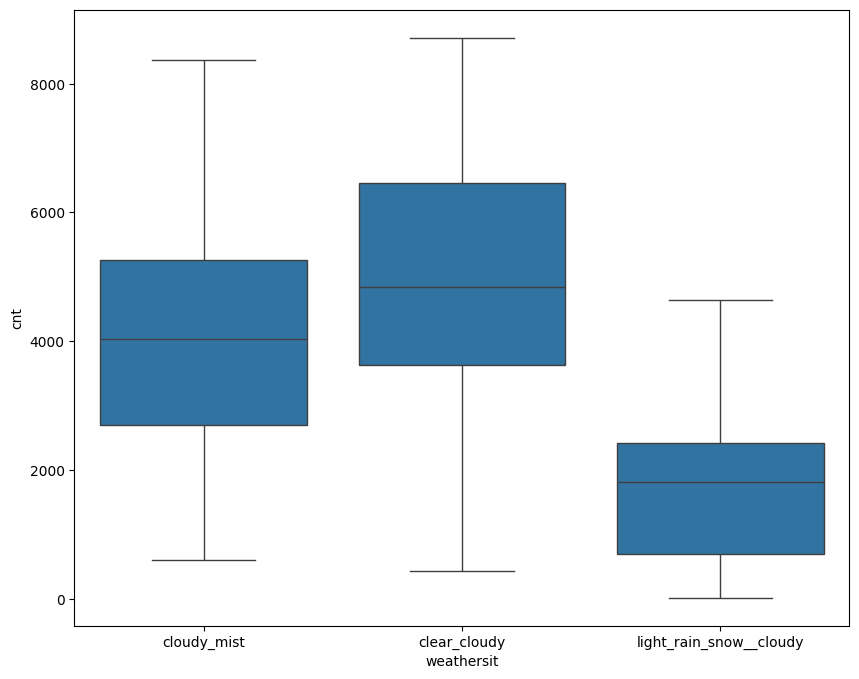

In [16]:
# Experimental plotting with weathersit and bikeshare
plt.figure(figsize=(10,8))
sns.boxplot(x='weathersit', y='cnt', data=mapped_df)

## Modelling prep

#### Splitting the data into train and test

In [17]:
df_train, df_test = train_test_split(boom_bikes, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 12)
(220, 12)


##### Min max scaling, normalization, and standardization

In [18]:
scaler = MinMaxScaler()
num_vars = ['temp', 'atemp', 'hum', 'windspeed']

# data fitting
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,cnt,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
576,7216,3,1,7,0,2,1,1,0.815169,0.766351,0.725633,0.264686
426,4066,1,1,3,0,6,0,2,0.442393,0.438975,0.640189,0.255342
728,1796,1,1,12,0,0,0,1,0.245101,0.200348,0.498067,0.663106
482,4220,2,1,4,0,6,0,2,0.395666,0.391735,0.504508,0.188475
111,1683,2,0,4,0,5,1,2,0.345824,0.318819,0.751824,0.380981


#### Training a model to predict bike rentals

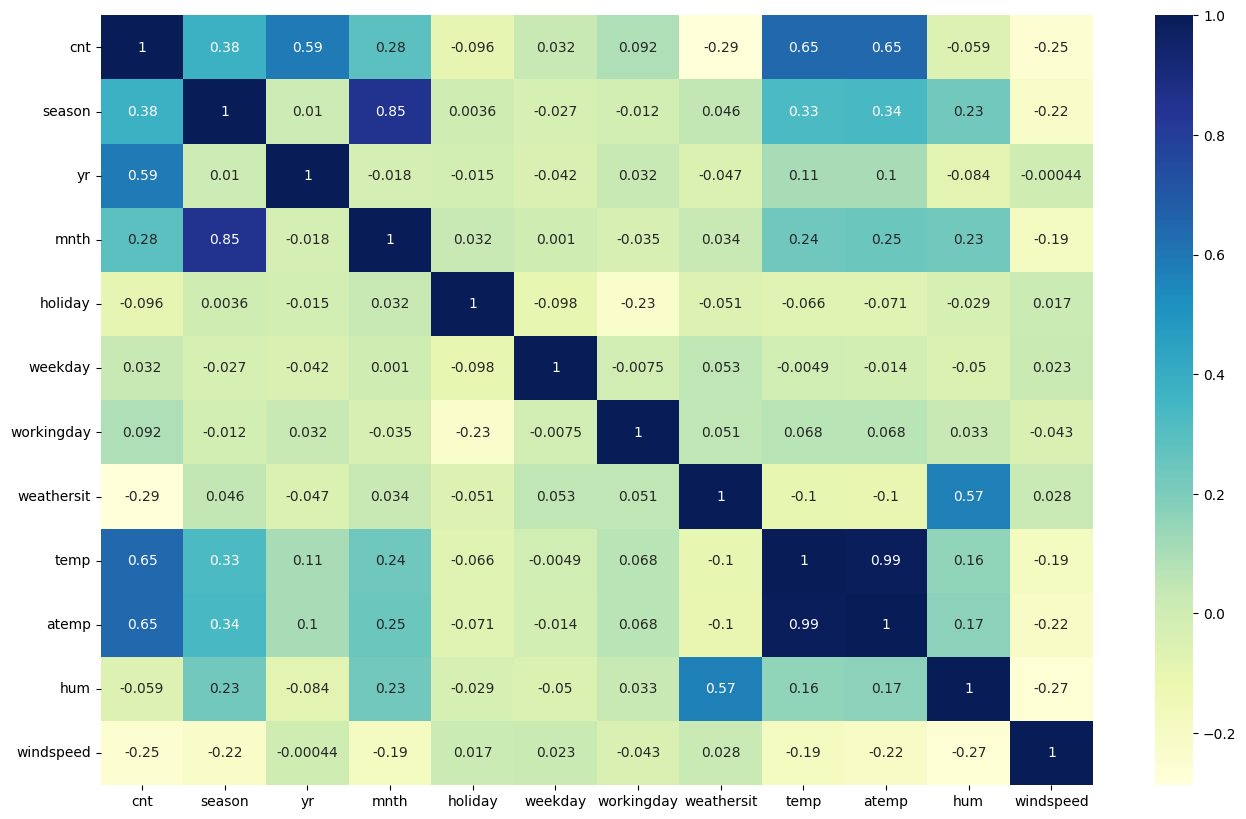

In [19]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap = "YlGnBu")
plt.show()

In [20]:
y_train = df_train.pop('cnt')
x_train = df_train

In [21]:
x_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
576,3,1,7,0,2,1,1,0.815169,0.766351,0.725633,0.264686
426,1,1,3,0,6,0,2,0.442393,0.438975,0.640189,0.255342
728,1,1,12,0,0,0,1,0.245101,0.200348,0.498067,0.663106
482,2,1,4,0,6,0,2,0.395666,0.391735,0.504508,0.188475
111,2,0,4,0,5,1,2,0.345824,0.318819,0.751824,0.380981


In [22]:
y_train.head()

576    7216
426    4066
728    1796
482    4220
111    1683
Name: cnt, dtype: int64

#### Analyze model performance

In [23]:
# On temp
x_train_statmodel = sm.add_constant(x_train['temp'])

# create a model
ln_reg = sm.OLS(y_train, x_train_statmodel)

# fit the model
ln_reg_model = ln_reg.fit()

# print the model
print(ln_reg_model.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Wed, 05 Mar 2025   Prob (F-statistic):           2.46e-61
Time:                        23:24:03   Log-Likelihood:                -4449.7
No. Observations:                 510   AIC:                             8903.
Df Residuals:                     508   BIC:                             8912.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1491.2143    170.676      8.737      0.0

In [24]:
# Adding atemp
x_train_statmodel = sm.add_constant(x_train[['temp', 'atemp']])

# create a model
ln_reg = sm.OLS(y_train, x_train_statmodel)

# fit the model
ln_reg_model = ln_reg.fit()

# print the model
print(ln_reg_model.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 05 Mar 2025   Prob (F-statistic):           8.38e-61
Time:                        23:24:03   Log-Likelihood:                -4447.7
No. Observations:                 510   AIC:                             8901.
Df Residuals:                     507   BIC:                             8914.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1435.8732    172.475      8.325      0.0

In [25]:
#adding humidity
x_train_statmodel = sm.add_constant(x_train[['temp', 'atemp', 'hum']])

# create a model
ln_reg = sm.OLS(y_train, x_train_statmodel)

# fit the model
ln_reg_model = ln_reg.fit()

# print the model
print(ln_reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     137.6
Date:                Wed, 05 Mar 2025   Prob (F-statistic):           3.55e-65
Time:                        23:24:03   Log-Likelihood:                -4434.8
No. Observations:                 510   AIC:                             8878.
Df Residuals:                     506   BIC:                             8895.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2796.1405    314.020      8.904      0.0

In [26]:
# Adding weekday
x_train_statmodel = sm.add_constant(x_train[['temp', 'atemp', 'hum', 'weekday']])

# create a model
ln_reg = sm.OLS(y_train, x_train_statmodel)

# fit the model
ln_reg_model = ln_reg.fit()

# print the model
print(ln_reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.450
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     103.4
Date:                Wed, 05 Mar 2025   Prob (F-statistic):           2.77e-64
Time:                        23:24:03   Log-Likelihood:                -4434.3
No. Observations:                 510   AIC:                             8879.
Df Residuals:                     505   BIC:                             8900.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2687.1224    332.629      8.078      0.0

In [27]:
# Adding all
x_train_statmodel = sm.add_constant(x_train)

# create a model
ln_reg = sm.OLS(y_train, x_train_statmodel)

# fit the model
ln_reg_model = ln_reg.fit()

print(ln_reg_model.params)

const         1893.154075
season         408.150067
yr            2041.481698
mnth           -12.302998
holiday       -596.435402
weekday         68.582100
workingday     168.694131
weathersit    -686.972839
temp          1856.468469
atemp         2458.445911
hum           -845.001650
windspeed    -1368.883635
dtype: float64


In [28]:
# print the model
ln_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     185.7
Date:                Wed, 05 Mar 2025   Prob (F-statistic):          2.86e-168
Time:                        23:24:03   Log-Likelihood:                -4171.4
No. Observations:                 510   AIC:                             8367.
Df Residuals:                     498   BIC:                             8418.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1893.1541    261.092      7.251      0.000    1380.177    2406.131
season       408.1501     69.169      5.901      0.000     272.251     544.050
yr          2041.4817     78.412     26.035      0.000    1887.424    2195.540
mnth         -12.3030     21.603     -0.570      0.569     -54.747      30.141
holiday     -596.4354    254.809     -2.341      0.020   -1097.069     -95.801
weekday       68.5821     19.507      3.516      0.000      30.257     106.908
workingday   168.6941     85.451      1.974      0.049       0.805     336.583
weathersit  -686.9728     91.231     -7.530      0.000    -866.218    -507.727
temp        1856.4685   1212.959      1.531      0.127    -526.680    4239.617
atemp       2458.4459   1301.513      1.889      0.059     -98.687    5015.578
hum         -845.0016    360.941     -2.341      0.020   -1554.157    -135.846
windspeed  -1368.8836    249.911     -5.477      0.000   -1859.893    -877.874
==============================================================================
Omnibus:                       62.779   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.597
Skew:                          -0.662   Prob(JB):                     6.58e-32
Kurtosis:                       5.237   Cond. No.                         394.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF

In [29]:
vif = pd.DataFrame()
vif['Features'] = x_train.columns
vif['VIF'] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,atemp,345.57
7,temp,332.66
9,hum,24.93
0,season,23.68
2,mnth,17.07
6,weathersit,12.57
10,windspeed,3.79
5,workingday,3.14
4,weekday,3.04
1,yr,2.01


In [30]:
# Dropping the variables which are highly correlated with the target variable
#iteration 2
X = x_train.drop(columns=['atemp'])

In [31]:
X_train_lin_model = sm.add_constant(X)
ln_reg_1 = sm.OLS(y_train, X_train_lin_model).fit()
ln_reg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     202.8
Date:                Wed, 05 Mar 2025   Prob (F-statistic):          1.15e-168
Time:                        23:24:03   Log-Likelihood:                -4173.2
No. Observations:                 510   AIC:                             8368.
Df Residuals:                     499   BIC:                             8415.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1944.7492    260.326      7.470      0.000    1433.279    2456.220
season       411.6415     69.322      5.938      0.000     275.442     547.841
yr          2040.8742     78.612     25.961      0.000    1886.422    2195.326
mnth         -12.4568     21.658     -0.575      0.565     -55.010      30.096
holiday     -617.9151    255.210     -2.421      0.016   -1119.333    -116.497
weekday       66.5075     19.526      3.406      0.001      28.145     104.870
workingday   167.5324     85.668      1.956      0.051      -0.783     335.847
weathersit  -697.6903     91.289     -7.643      0.000    -877.048    -518.333
temp        4119.3769    190.437     21.631      0.000    3745.219    4493.535
hum         -792.0494    360.776     -2.195      0.029   -1500.876     -83.223
windspeed  -1448.4354    246.970     -5.865      0.000   -1933.664    -963.207
==============================================================================
Omnibus:                       55.724   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.114
Skew:                          -0.600   Prob(JB):                     1.12e-27
Kurtosis:                       5.098   Cond. No.                         94.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Recalculate the VIF

In [32]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,hum,24.16
0,season,23.64
2,mnth,17.07
6,weathersit,12.51
7,temp,7.86
9,windspeed,3.72
5,workingday,3.14
4,weekday,3.04
1,yr,2.01
3,holiday,1.09


In [33]:
X.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed
576,3,1,7,0,2,1,1,0.815169,0.725633,0.264686
426,1,1,3,0,6,0,2,0.442393,0.640189,0.255342
728,1,1,12,0,0,0,1,0.245101,0.498067,0.663106
482,2,1,4,0,6,0,2,0.395666,0.504508,0.188475
111,2,0,4,0,5,1,2,0.345824,0.751824,0.380981


In [34]:
# Iteration 3
X = X.drop(columns=['hum'])
X_train_lin_model = sm.add_constant(X)

ln_reg_3 = sm.OLS(y_train, X_train_lin_model).fit()
print(ln_reg_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     223.1
Date:                Wed, 05 Mar 2025   Prob (F-statistic):          8.16e-169
Time:                        23:24:03   Log-Likelihood:                -4175.7
No. Observations:                 510   AIC:                             8371.
Df Residuals:                     500   BIC:                             8414.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1596.0276    207.036      7.709      0.0

In [35]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,season,23.45
2,mnth,16.89
7,temp,6.60
6,weathersit,6.03
8,windspeed,3.71
5,workingday,3.06
4,weekday,3.01
1,yr,2.01
3,holiday,1.08


In [36]:
# Iteration 4
X = X.drop(columns=['season'])
X_train_lin_model = sm.add_constant(X)

ln_reg_4 = sm.OLS(y_train, X_train_lin_model).fit()
print(ln_reg_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     230.7
Date:                Wed, 05 Mar 2025   Prob (F-statistic):          1.37e-162
Time:                        23:24:03   Log-Likelihood:                -4193.1
No. Observations:                 510   AIC:                             8404.
Df Residuals:                     501   BIC:                             8442.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1802.9837    211.014      8.544      0.0

In [37]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,temp,5.87
5,weathersit,5.86
1,mnth,4.53
7,windspeed,3.71
4,workingday,3.05
3,weekday,3.01
0,yr,2.01
2,holiday,1.08


#### The VIF is in acceptable range, we can proceed with the model

### Residual analysis

Text(0.5, 0, 'Errors')

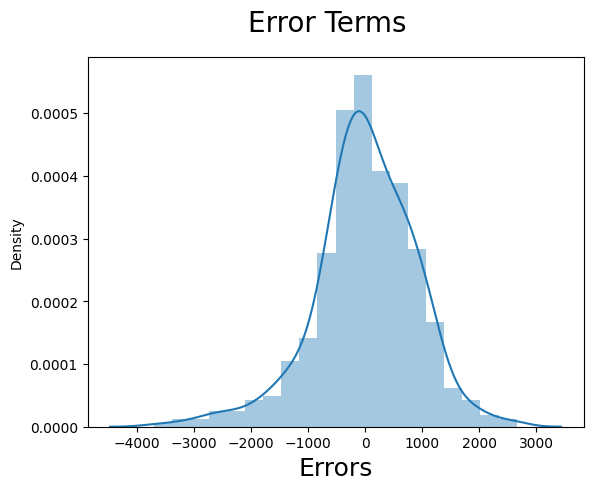

In [38]:
y_train_f = ln_reg_4.predict(X_train_lin_model)
fig = plt.figure()
sns.distplot((y_train - y_train_f), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

In [39]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed' ]

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [40]:
df_test.head()

,cnt,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
184,6043,3,0,7,1,1,0,2,0.831783,0.769660,0.657364,0.084219
535,6211,2,1,6,0,3,1,1,0.901354,0.842587,0.610133,0.153728
299,2659,4,0,10,0,4,1,2,0.511964,0.496145,0.837699,0.334206
221,4780,3,0,8,0,3,1,1,0.881625,0.795343,0.437098,0.339570
152,4968,2,0,6,0,4,1,1,0.817246,0.741471,0.314298,0.537414


In [41]:
y_test = df_test.pop('cnt')
X_test = df_test

In [42]:
X_test.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,2.463636,0.481818,6.490909,0.036364,3.013636,0.700000,1.372727,0.558718,0.532847,0.638221,0.313293
std,1.111807,0.500809,3.422316,0.187620,1.985057,0.459303,0.538204,0.233187,0.217401,0.148694,0.159584
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.046591,0.025950,0.261915,-0.042808
25%,1.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.355429,0.344870,0.529197,0.198843
50%,2.000000,0.000000,6.000000,0.000000,3.000000,1.000000,1.000000,0.558172,0.544652,0.625590,0.300126
75%,3.000000,1.000000,9.000000,0.000000,5.000000,1.000000,2.000000,0.755981,0.713308,0.743798,0.402718
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.984424,0.980934,1.002146,0.807474


In [43]:
X_test_f = sm.add_constant(X_test)

In [44]:
y_pred_f = ln_reg_model.predict(X_test_f)

Text(0, 0.5, 'y_pred')

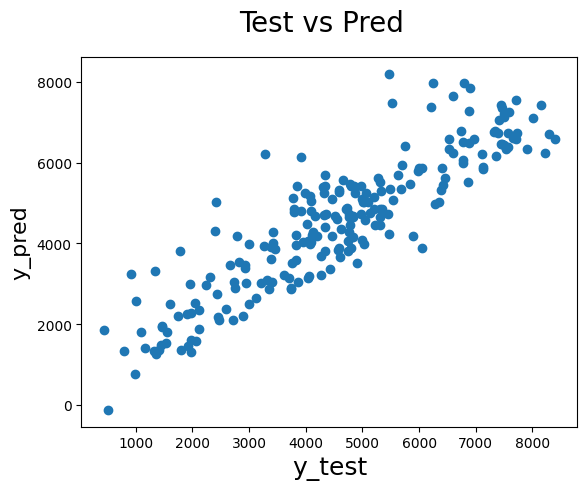

In [45]:
fig = plt.figure()
plt.scatter(y_test, y_pred_f)
fig.suptitle('Test vs Pred', fontsize = 20)  
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)  

In [46]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_f)

0.7880117152886821